## AI Image Caption Recommendation System

Applications like Instagram still lack a caption-generation tool because most LLMs don’t write captions; they describe the image instead. This is where a caption recommendation system can help, using a library of captions to find the caption that goes well with the image.I will build an AI Image Caption Recommendation System using a retrieval-based approach, leveraging CLIP (Contrastive Language–Image Pre-training) for both image and text understanding.

First, the input image will be preprocessed and fed into the CLIP image encoder to generate a high-dimensional feature vector representing the image’s visual content. A similar process will be applied to a set of candidate captions, using the CLIP text encoder to generate text embeddings for each caption. Next, the cosine similarity between the image embedding and each caption embedding will be calculated. This similarity score will quantify how well each caption aligns with the visual content of the image.

Finally, the system ranks the candidate captions based on their similarity scores and presents the top-ranked captions as recommendations.

**Building an AI Image Caption Recommendation System using Python**

Now, let’s get started with building an AI Image Caption Recommendation System by importing the necessary Python libraries:

In [1]:
import torch
from PIL import Image
from transformers import CLIPProcessor, CLIPModel, AutoProcessor, AutoModelForCausalLM

Now, let’s write a Python function for handling the loading and preprocessing of an image:

In [2]:
# image loading and preprocessing
def load_and_preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")
    processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
    inputs = processor(images=image, return_tensors="pt")
    return inputs, processor

This function opens the image using PIL, converts it to RGB format (important for consistency), and then uses the CLIPProcessor to transform the image into a format suitable for the CLIP model. The processor handles resizing, normalization, and other necessary transformations. The output will be a PyTorch tensor ready for CLIP.

**Generating Image Embeddings**

Now, we will write a function to generate image embeddings using CLIP. CLIP is a multi-modal model which leverages the power of LLMs, which can understand the content of images and match them to their relevant textual descriptions. Let’s write the function to generate image embeddings:

In [3]:
# image understanding with CLIP
def generate_image_embeddings(inputs):
    model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
    with torch.no_grad():
        image_features = model.get_image_features(**inputs)

    return image_features, model

This function loads the pre-trained CLIP model. The crucial step here is model.get_image_features(**inputs), which passes the preprocessed image tensor to the CLIP model and extracts a high-dimensional feature vector representing the image’s visual content. torch.no_grad() is used to prevent gradient calculations during inference, saving memory and speeding up the process.

**Matching Image with Text Embeddings**

Now, we will write a function to match captions:

In [4]:
# caption matching (using CLIP text embeddings)
def match_captions(image_features, captions, clip_model, processor):
    # 1. get text embeddings for the captions:
    text_inputs = processor(text=captions, return_tensors="pt", padding=True)
    with torch.no_grad():
        text_features = clip_model.get_text_features(**text_inputs)

    # 2. calculate cosine similarity between image and text features:
    image_features = image_features.detach().cpu().numpy()
    text_features = text_features.detach().cpu().numpy()

    similarities = cosine_similarity(image_features, text_features)

    # 3. find the best matching captions:
    best_indices = similarities.argsort(axis=1)[0][::-1]  
    best_captions = [captions[i] for i in best_indices]

    return best_captions, similarities[0][best_indices].tolist()

This function takes the image features and a list of candidate captions as input. It processes the captions using the same CLIPProcessor (now for text) to get text embeddings. It then calculates the cosine similarity between the image embedding and each text embedding. Cosine similarity measures the angle between two vectors; a value closer to 1 indicates higher similarity. The function will return the captions ranked by similarity and their corresponding similarity scores.

Now, let’s write the driver function:

In [5]:
# main function
def image_captioning(image_path, candidate_captions):  
    inputs, processor = load_and_preprocess_image(image_path)
    image_features, clip_model = generate_image_embeddings(inputs)

    best_captions, similarities = match_captions(image_features, candidate_captions, clip_model, processor)
    return best_captions, similarities

This function ties together the preprocessing, feature extraction, and matching processes. It takes an image path and a list of candidate captions, processes the image, gets its features, and then matches these features against the captions. The result will be a list of best-fit captions with their similarity scores.

Now, let’s write a list of captions that we can use to match with the image:

In [6]:
candidate_captions = [
    "Trees, Travel and Tea!",
    "A refreshing beverage.",
    "A moment of indulgence.",
    "The perfect thirst quencher.",
    "Your daily dose of delight.",
    "Taste the tradition.",
    "Savor the flavor.",
    "Refresh and rejuvenate.",
    "Unwind and enjoy.",
    "The taste of home.",
    "A treat for your senses.",
    "A taste of adventure.",
    "A moment of bliss.",
    "Your travel companion.",
    "Fuel for your journey.",
    "The essence of nature.",
    "The warmth of comfort.",
    "A sip of happiness.",
    "Pure indulgence.",
    "Quench your thirst, ignite your spirit.",
    "Awaken your senses, embrace the moment.",
    "The taste of faraway lands.",
    "A taste of home, wherever you are.",
    "Your daily dose of delight.",
    "Your moment of serenity.",
    "The perfect pick-me-up.",
    "The perfect way to unwind.",
    "Taste the difference.",
    "Experience the difference.",
    "A refreshing escape.",
    "A delightful escape.",
    "The taste of tradition, the spirit of adventure.",
    "The warmth of home, the joy of discovery.",
    "Your passport to flavor.",
    "Your ticket to tranquility.",
    "Sip, savor, and explore.",
    "Indulge, relax, and rejuvenate.",
    "The taste of wanderlust.",
    "The comfort of home.",
    "A journey for your taste buds.",
    "A haven for your senses.",
    "Your refreshing companion.",
    "Your delightful escape.",
    "Taste the world, one sip at a time.",
    "Embrace the moment, one cup at a time.",
    "The essence of exploration.",
    "The comfort of connection.",
    "Quench your thirst for adventure.",
    "Savor the moment of peace.",
    "The taste of discovery.",
    "The warmth of belonging.",
    "Your travel companion, your daily delight.",
    "Your moment of peace, your daily indulgence.",
    "The spirit of exploration, the comfort of home.",
    "The joy of discovery, the warmth of connection.",
    "Sip, savor, and set off on an adventure.",
    "Indulge, relax, and find your peace.",
    "A delightful beverage.",
    "A moment of relaxation.",
    "The perfect way to start your day.",
    "The perfect way to end your day.",
    "A treat for yourself.",
    "Something to savor.",
    "A moment of calm.",
    "A taste of something special.",
    "A refreshing pick-me-up.",
    "A comforting drink.",
    "A taste of adventure.",
    "A moment of peace.",
    "A small indulgence.",
    "A daily ritual.",
    "A way to connect with others.",
    "A way to connect with yourself.",
    "A taste of home.",
    "A taste of something new.",
    "A moment to enjoy.",
    "A moment to remember."
]

The quality and diversity of these captions will significantly impact the system’s performance.

**Let’s Test by Finding Captions**

Now, I will take an image as input and use our AI Image Recommendation System to find the best captions for the image. Below is the image I am using:
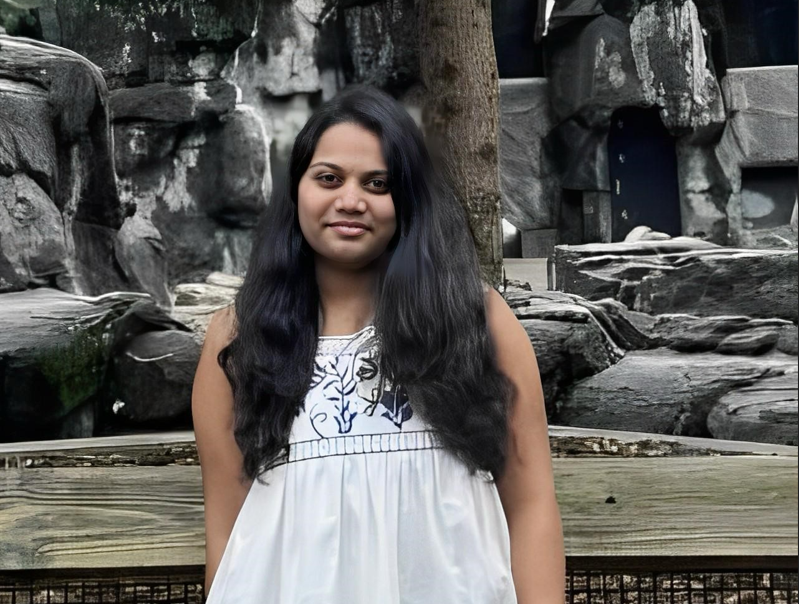

Now, let’s find the most relevant captions for the image:

In [7]:
from sklearn.metrics.pairwise import cosine_similarity 

best_captions, similarities = image_captioning("chaitna.png", candidate_captions)

# get the top 5 results
top_n = min(5, len(best_captions))
top_best_captions = best_captions[:top_n]
top_similarities = similarities[:top_n]

print("Top 5 Best Captions:")
for i, (caption, similarity) in enumerate(zip(top_best_captions, top_similarities)):
    print(f"{i+1}. {caption} (Similarity: {similarity:.4f})")

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Top 5 Best Captions:
1. Trees, Travel and Tea! (Similarity: 0.2272)
2. A moment to enjoy. (Similarity: 0.2268)
3. A moment to remember. (Similarity: 0.2204)
4. A moment of bliss. (Similarity: 0.2165)
5. The joy of discovery, the warmth of connection. (Similarity: 0.2159)


This is how to use the image_captioning function with an image path and the list of candidate captions. As you can see, it then prints the top 5 best captions along with their similarity scores. This caption recommendation system doesn’t describe the image that an LLM will do. It recommends a relevant caption from a list of captions that you can use on social media platforms.

So, by leveraging CLIP’s ability to create joint image-text embeddings, the system efficiently matches an image to the most similar captions from a pre-defined list, which offers a practical solution for quickly finding relevant captions for platforms like social media.